In [9]:
# Download an example FITS file, create a 2D cutout, and save it to a
# new FITS file, including the updated cutout WCS.
from astropy.io import fits
from astropy.nddata import Cutout2D
from astropy.utils.data import download_file
from astropy.wcs import WCS
import matplotlib.pyplot as plt 

e815_t00410 = "/media/bekah/BekahA/backplanes/e00815/e00815-nd-b00-f0001-t00410-g_dose.fits.gz"

# Load the image and the WCS
hdu = fits.open(e815_t00410)[0]

position = (hdu.header['NAXIS1']/2, hdu.header['NAXIS2']/2)
size = (1500, 1500)     # pixels

# Make the cutout, including the WCS
cutout = Cutout2D(hdu.data, position=position, size=size)

# Put the cutout image in the FITS HDU
hdu.data = cutout.data


# Write the cutout to a new FITS file
cutout_filename = 'example_cutout.fits'
hdu.writeto(cutout_filename, overwrite=True)



<Axes: >

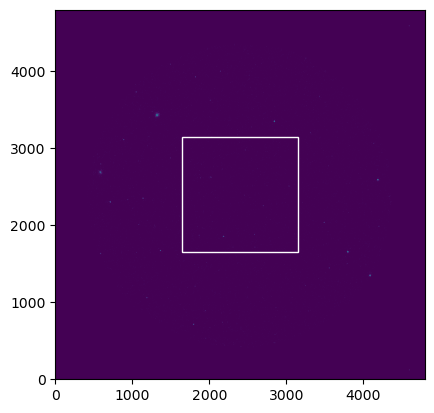

In [21]:
# Load the image and the WCS
from compare_aspect.plots import centile_clip

hdu = fits.open(e815_t00410)[0]
plt.imshow(centile_clip(hdu.data,(0,99.995)), origin='lower')
cutout.plot_on_original(color='white')

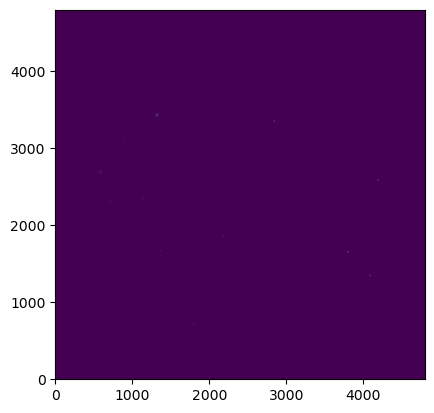

In [23]:
hdu = fits.open(e815_t00410)[0]
plt.imshow(centile_clip(hdu.data,(0,99.9995)), origin='lower')